<a href="https://www.kaggle.com/code/siddhantmodi760/iplanalysis?scriptVersionId=190837557" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#load dataset
match_df = pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/matches.csv")
matches = pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/matches.csv")
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [3]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [4]:
match_df['winner'].value_counts()

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [5]:
match_df['team1'].value_counts()

team1
Royal Challengers Bangalore    135
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                85
Delhi Capitals                  41
Deccan Chargers                 39
Punjab Kings                    31
Lucknow Super Giants            23
Pune Warriors                   23
Gujarat Titans                  21
Gujarat Lions                   16
Royal Challengers Bengaluru      9
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [6]:
match_df[match_df['winner'].isnull()== True]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


In [7]:
##replacing null results
match_df['winner'].fillna('Draw',inplace=True)

In [8]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [9]:
team_encoding = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders':2,
    'Royal Challengers Bangalore':3,
    'Deccan Chargers' :4,
    'Chennai Super Kings':5,
    'Rajasthan Royals':6,
    'Delhi Daredevils':7,
    'Gujarat Lions':8,
    'Kings XI Punjab':9,
    'Sunrisers Hyderabad':10,
    'Rising Pune Supergiants':11,
    'Rising Pune Supergiant':11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors':13,
    'Delhi Capitals':7,
    'Punjab Kings' :9,
    'Lucknow Super Giants':14,
    'Gujarat Titans':15,
    'Royal Challengers Bengaluru':3,
    'Draw':16
}
team_encode_dict = {
    'team1':team_encoding,
    'team2':team_encoding,
    'toss_winner':team_encoding,
    'winner':team_encoding,
}
match_df.replace(team_encode_dict, inplace =True)
match_df.head(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,3,2,3,field,2,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",9,5,5,bat,5,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,7,6,6,bat,7,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,1,3,1,bat,3,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,2,4,4,bat,2,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,6,9,9,bat,6,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",4,7,4,bat,7,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba
7,335989,2007/08,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",5,1,1,field,5,runs,6.0,209.0,20.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",4,6,6,field,6,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",9,1,1,field,9,runs,66.0,183.0,20.0,N,NaN,Aleem Dar,AM Saheba


In [10]:
##missing values in city col
match_df['city'].value_counts() 

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Guwahati            3
Nagpur              3
Bloemfontein        2
Name: count, dtype: int64

In [11]:
match_df[match_df['city'].isnull()==True]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,7,3,3,field,3,wickets,8.0,146.0,20.0,N,NaN,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,3,1,3,field,3,wickets,7.0,116.0,20.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,2,7,2,bat,7,wickets,4.0,167.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,6,9,9,field,9,wickets,7.0,192.0,20.0,N,NaN,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,9,10,10,field,9,runs,72.0,194.0,20.0,N,NaN,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,6,5,6,field,5,runs,7.0,141.0,20.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,3,2,3,field,2,runs,2.0,151.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,10,7,10,bat,10,runs,4.0,185.0,20.0,N,NaN,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,5,1,1,bat,5,wickets,7.0,142.0,20.0,N,NaN,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,7,1,1,bat,7,wickets,6.0,126.0,20.0,N,NaN,Aleem Dar,VA Kulkarni


In [12]:
match_df['city'].fillna('Dubai',inplace=True)
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   int64  
 8   team2            1095 non-null   int64  
 9   toss_winner      1095 non-null   int64  
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   int64  
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [13]:
match_df.describe()

,id,team1,team2,toss_winner,winner,result_margin,target_runs,target_overs
count,1.095000e+03,1095.000000,1095.000000,1095.000000,1095.000000,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,5.799087,5.862100,5.696804,5.734247,17.259294,165.684066,19.759341
std,3.677402e+05,3.592827,3.659924,3.574659,3.708489,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,1.000000,1.000000,1.000000,1.000000,43.000000,5.000000
25%,5.483315e+05,3.000000,3.000000,3.000000,2.000000,6.000000,146.000000,20.000000
50%,9.809610e+05,5.000000,6.000000,5.000000,5.000000,8.000000,166.000000,20.000000
75%,1.254062e+06,9.000000,9.000000,9.000000,9.000000,20.000000,187.000000,20.000000
max,1.426312e+06,15.000000,15.000000,15.000000,16.000000,146.000000,288.000000,20.000000


In [14]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,3,2,3,field,2,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",9,5,5,bat,5,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,7,6,6,bat,7,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,1,3,1,bat,3,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,2,4,4,bat,2,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [15]:
match_df['team1'].value_counts()

team1
3     144
5     128
7     126
9     123
1     123
2     121
6     101
10     86
4      39
13     23
14     23
15     21
8      16
11     14
12      7
Name: count, dtype: int64

In [16]:
match_df['team1']=match_df['team1'].astype(int)
match_df['team2']=match_df['team2'].astype(int)
match_df['toss_winner']=match_df['toss_winner'].astype(int)
match_df.describe()

,id,team1,team2,toss_winner,winner,result_margin,target_runs,target_overs
count,1.095000e+03,1095.000000,1095.000000,1095.000000,1095.000000,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,5.799087,5.862100,5.696804,5.734247,17.259294,165.684066,19.759341
std,3.677402e+05,3.592827,3.659924,3.574659,3.708489,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,1.000000,1.000000,1.000000,1.000000,43.000000,5.000000
25%,5.483315e+05,3.000000,3.000000,3.000000,2.000000,6.000000,146.000000,20.000000
50%,9.809610e+05,5.000000,6.000000,5.000000,5.000000,8.000000,166.000000,20.000000
75%,1.254062e+06,9.000000,9.000000,9.000000,9.000000,20.000000,187.000000,20.000000
max,1.426312e+06,15.000000,15.000000,15.000000,16.000000,146.000000,288.000000,20.000000


In [17]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   int64  
 8   team2            1095 non-null   int64  
 9   toss_winner      1095 non-null   int64  
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   int64  
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [18]:
toss_wins = match_df['toss_winner'].value_counts(sort=True)
match_wins = match_df['winner'].value_counts(sort=True)

# Iterate over the match winners
for idx, val in match_wins.items():
    team_name = list(team_encode_dict['winner'].keys())[idx-1]
    toss_win_count = toss_wins.get(idx, 0)  # Get the number of toss wins for this team, defaulting to 0 if not found
    print(f"{team_name} -> {toss_win_count}")

Mumbai Indians -> 143
Chennai Super Kings -> 122
Kolkata Knight Riders -> 122
Royal Challengers Bangalore -> 121
Delhi Daredevils -> 130
Rajasthan Royals -> 120
Kings XI Punjab -> 109
Sunrisers Hyderabad -> 88
Deccan Chargers -> 43
Delhi Capitals -> 22
Pune Warriors -> 19
Rising Pune Supergiants -> 13
Gujarat Lions -> 15
Kochi Tuskers Kerala -> 20
Rising Pune Supergiant -> 8
Punjab Kings -> 0


<Axes: >

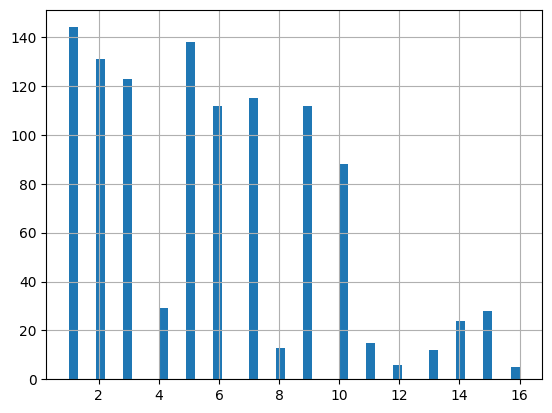

In [19]:
match_df['winner'].hist(bins=50)

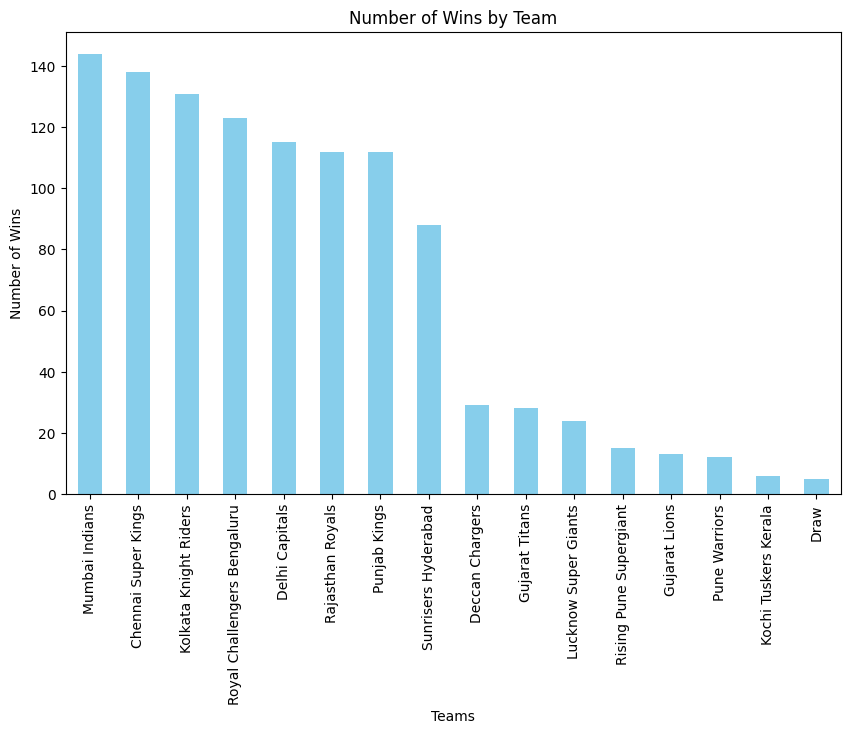

In [20]:
reverse_team_encode_dict = {v: k for k, v in team_encode_dict['winner'].items()}

# Map the encoded 'winner' column to team names
match_df['winner_name'] = match_df['winner'].map(reverse_team_encode_dict)

# Plot the histogram using the new column
match_df['winner_name'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Team')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()

In [21]:
match_df = match_df[['team1','team2','city','toss_decision','toss_winner','venue','winner', 'player_of_match']]
match_df

,team1,team2,city,toss_decision,toss_winner,venue,winner,player_of_match
0,3,2,Bangalore,field,3,M Chinnaswamy Stadium,2,BB McCullum
1,9,5,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5,MEK Hussey
2,7,6,Delhi,bat,6,Feroz Shah Kotla,7,MF Maharoof
3,1,3,Mumbai,bat,1,Wankhede Stadium,3,MV Boucher
4,2,4,Kolkata,bat,4,Eden Gardens,2,DJ Hussey
...,...,...,...,...,...,...,...,...
1090,9,10,Hyderabad,bat,9,"Rajiv Gandhi International Stadium, Uppal, Hyd...",10,Abhishek Sharma
1091,10,2,Ahmedabad,bat,10,"Narendra Modi Stadium, Ahmedabad",2,MA Starc
1092,3,6,Ahmedabad,field,6,"Narendra Modi Stadium, Ahmedabad",6,R Ashwin
1093,10,6,Chennai,field,6,"MA Chidambaram Stadium, Chepauk, Chennai",10,Shahbaz Ahmed


In [22]:
from sklearn.preprocessing import LabelEncoder
ftr_list = ['city','toss_decision','venue']
encoder = LabelEncoder()
for ftr in ftr_list:
    match_df[ftr] = encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)
    
match_df

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Guwahati' 'Hyderabad'
 'Indore' 'Jaipur' 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata'
 'Lucknow' 'Mohali' 'Mumbai' 'Nagpur' 'Navi Mumbai' 'Port Elizabeth'
 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah' 'Visakhapatnam']
['bat' 'field']
['Arun Jaitley Stadium' 'Arun Jaitley Stadium, Delhi' 'Barabati Stadium'
 'Barsapara Cricket Stadium, Guwahati'
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow'
 'Brabourne Stadium' 'Brabourne Stadium, Mumbai' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr DY Patil Sports Academy, Mumbai'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam'
 'Dubai International Cricket Stadium' 'Eden Gardens'
 'Eden Gardens, Kolkata' 'Feroz Shah Kotla' 'Green Park'
 'Him

,team1,team2,city,toss_decision,toss_winner,venue,winner,player_of_match
0,3,2,2,1,3,23,2,BB McCullum
1,9,5,7,0,5,40,5,MEK Hussey
2,7,6,10,0,6,16,7,MF Maharoof
3,1,3,26,0,1,55,3,MV Boucher
4,2,4,23,0,4,14,2,DJ Hussey
...,...,...,...,...,...,...,...,...
1090,9,10,16,0,9,43,10,Abhishek Sharma
1091,10,2,1,0,10,32,2,MA Starc
1092,3,6,1,1,6,32,6,R Ashwin
1093,10,6,8,1,6,28,10,Shahbaz Ahmed


In [23]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(match_df, test_size = 0.2, random_state=5)
print(train_df.shape)
print(test_df.shape)

(876, 8)
(219, 8)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def print_model_scores(model, data, predictor, target):
    model.fit(data[predictor], data[target])
    predictions = model.predict(data[predictor])
    accuracy = accuracy_score(predictions,data[target])
    print('Accuracy: %s' % '{0:.2}'.format(accuracy))
    scores = cross_val_score(model, data[predictor], data[target], scoring="neg_mean_squared_error", cv=5 )
    print('Cross-Validation Scores: {}'.format(np.sqrt(-scores)))
    print(f'Average RMSE: {np.sqrt(-scores).mean()}')

In [25]:
##logistic regression
target_var = ["winner"]
predictor_var = ['team1','team2','city','toss_winner','toss_decision','venue']
model = LogisticRegression()

print_model_scores(model, train_df, predictor_var, target_var)

Accuracy: 0.27
Cross-Validation Scores: [3.59213155 3.7032804  3.4201086  3.98425473 3.52541791]
Average RMSE: 3.6450386376412767


In [26]:
##random forest classifier
model = RandomForestClassifier(n_estimators=100)
print_model_scores(model, train_df, predictor_var,target_var)

Accuracy: 0.92
Cross-Validation Scores: [3.67809857 3.99428163 3.57611122 4.16310324 4.0461622 ]
Average RMSE: 3.89155137074208


In [27]:
team1 = 'Mumbai Indians'
team2 = 'Sunrisers Hyderabad'
toss_winner = 'Sunrisers Hyderabad'
inp = [team_encode_dict['team1'][team1],team_encode_dict['team2'][team2],'14',team_encode_dict['toss_winner'][toss_winner],'2','1']
print(inp)
inp = np.array(inp).reshape((1,-1))
print(inp)
output=model.predict(inp)
print(output)
print(f"The winner would be: {list(team_encoding.keys())[list(team_encode_dict['team1'].values()).index(output)]}")

[1, 10, '14', 10, '2', '1']
[['1' '10' '14' '10' '2' '1']]
[10]
The winner would be: Sunrisers Hyderabad


In [28]:
pd.Series(index=predictor_var, data=model.feature_importances_)

team1            0.207276
team2            0.232558
city             0.143116
toss_winner      0.178464
toss_decision    0.055132
venue            0.183454
dtype: float64

In [29]:
man_of_the_match_counts = match_df['player_of_match'].value_counts().reset_index()
man_of_the_match_counts.columns = ['player', 'awards']

# Display the top 10 players with the most "Man of the Match" awards
top_man_of_the_match = man_of_the_match_counts.head(10)
print(top_man_of_the_match)

           player  awards
0  AB de Villiers      25
1        CH Gayle      22
2       RG Sharma      19
3       DA Warner      18
4         V Kohli      18
5        MS Dhoni      17
6       SR Watson      16
7       YK Pathan      16
8       RA Jadeja      16
9      AD Russell      15


In [30]:
match_df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner,player_of_match
0,3,2,2,1,3,23,2,BB McCullum
1,9,5,7,0,5,40,5,MEK Hussey
2,7,6,10,0,6,16,7,MF Maharoof
3,1,3,26,0,1,55,3,MV Boucher
4,2,4,23,0,4,14,2,DJ Hussey


**Team Wise Analysis**

In [31]:
matches = pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/matches.csv")

In [32]:
# Mapping dictionary for old names to standardized names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
}

team_columns = ['winner', 'team1', 'team2', 'toss_winner']

# Replace the team names in the 'winner' column
matches[team_columns] = matches[team_columns].replace(team_name_mapping)

In [33]:
teams_to_drop = ['Rising Pune Supergiant', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Deccan Chargers', 'Gujarat Lions']

# Filter out the rows where 'winner_name' is in the list
current_teams_data =matches[~matches.apply(lambda row: row.isin(teams_to_drop).any(), axis=1)]

# Display the filtered DataFrame
print(current_teams_data)

           id   season        city        date   match_type  player_of_match  \
0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
5      335987  2007/08      Jaipur  2008-04-21       League        SR Watson   
...       ...      ...         ...         ...          ...              ...   
1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc   

                                       

In [34]:
teams = pd.concat([current_teams_data['team1'], current_teams_data['team2']]).unique()
team_stats = pd.DataFrame(teams, columns=['team_name'])

team_stats

,team_name
0,Royal Challengers Bangalore
1,Punjab Kings
2,Delhi Capitals
3,Mumbai Indians
4,Rajasthan Royals
5,Chennai Super Kings
6,Kolkata Knight Riders
7,Sunrisers Hyderabad
8,Lucknow Super Giants
9,Gujarat Titans


In [35]:
team_stats['matches_played'] = team_stats['team_name'].apply(lambda x: len(matches[(matches['team1'] == x) | (matches['team2'] == x)]))
team_stats['matches_won'] = team_stats['team_name'].apply(lambda x: len(matches[matches['winner'] == x]))
team_stats['win_percentage'] = (team_stats['matches_won'] / team_stats['matches_played']) * 100

team_stats

,team_name,matches_played,matches_won,win_percentage
0,Royal Challengers Bangalore,255,123,48.235294
1,Punjab Kings,246,112,45.528455
2,Delhi Capitals,252,115,45.634921
3,Mumbai Indians,261,144,55.172414
4,Rajasthan Royals,221,112,50.678733
5,Chennai Super Kings,238,138,57.983193
6,Kolkata Knight Riders,251,131,52.191235
7,Sunrisers Hyderabad,182,88,48.351648
8,Lucknow Super Giants,44,24,54.545455
9,Gujarat Titans,45,28,62.222222


In [36]:
team_stats['total_runs_scored'] = team_stats['team_name'].apply(lambda x: matches[matches['team1'] == x]['target_runs'].sum() + matches[matches['team2'] == x]['target_runs'].sum())
team_stats['total_wickets_taken'] = team_stats['team_name'].apply(lambda x: matches[matches['team1'] == x]['target_overs'].sum() + matches[matches['team2'] == x]['target_overs'].sum())

team_stats['total_runs_scored'] = team_stats['total_runs_scored'].astype(int)
team_stats['total_wickets_taken'] = team_stats['total_wickets_taken'].astype(int)

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken
0,Royal Challengers Bangalore,255,123,48.235294,42793,5000
1,Punjab Kings,246,112,45.528455,41178,4854
2,Delhi Capitals,252,115,45.634921,41422,4940
3,Mumbai Indians,261,144,55.172414,43728,5214
4,Rajasthan Royals,221,112,50.678733,36250,4363
5,Chennai Super Kings,238,138,57.983193,39503,4693
6,Kolkata Knight Riders,251,131,52.191235,40557,4907
7,Sunrisers Hyderabad,182,88,48.351648,30071,3580
8,Lucknow Super Giants,44,24,54.545455,7835,860
9,Gujarat Titans,45,28,62.222222,7865,895


In [37]:
deliveries = pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv')

In [38]:
team_stats['average_runs_scored_per_match'] = team_stats['total_runs_scored'] / team_stats['matches_played']
team_stats['run_rate'] = team_stats['team_name'].apply(lambda x: deliveries[deliveries['batting_team'] == x]['total_runs'].sum() / (deliveries[deliveries['batting_team'] == x].shape[0] / 6))
team_stats['economy_rate'] = team_stats['team_name'].apply(lambda x: deliveries[deliveries['bowling_team'] == x]['total_runs'].sum() / (deliveries[deliveries['bowling_team'] == x].shape[0] / 6))

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate
0,Royal Challengers Bangalore,255,123,48.235294,42793,5000,167.815686,8.018153,8.036039
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590
2,Delhi Capitals,252,115,45.634921,41422,4940,164.373016,8.167367,8.235556
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656
4,Rajasthan Royals,221,112,50.678733,36250,4363,164.027149,7.944593,7.977149
5,Chennai Super Kings,238,138,57.983193,39503,4693,165.978992,8.089561,7.812220
6,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011
7,Sunrisers Hyderabad,182,88,48.351648,30071,3580,165.225275,7.985442,8.040613
8,Lucknow Super Giants,44,24,54.545455,7835,860,178.068182,8.344444,8.513203
9,Gujarat Titans,45,28,62.222222,7865,895,174.777778,8.471423,8.460668


In [39]:
# Exclude no-result matches from deliveries
no_result_match_ids = [501265, 829763, 829813, 1178424, 1359519]

dl_matches = matches[matches['method'] == "D/L"]

# Extract match IDs
dl_match_ids = dl_matches['id'].tolist()


filtered_deliveriess = deliveries[~deliveries['match_id'].isin(no_result_match_ids)]

filtered_deliveries = filtered_deliveriess[~filtered_deliveriess['match_id'].isin(dl_match_ids)]

# Highest and lowest scores excluding no-result matches
highest_scores = filtered_deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
team_stats['highest_score'] = team_stats['team_name'].apply(lambda x: highest_scores[highest_scores['batting_team'] == x]['total_runs'].max())
team_stats['lowest_score'] = team_stats['team_name'].apply(lambda x: highest_scores[highest_scores['batting_team'] == x]['total_runs'].min())

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score
0,Royal Challengers Bangalore,255,123,48.235294,42793,5000,167.815686,8.018153,8.036039,263,49
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106
2,Delhi Capitals,252,115,45.634921,41422,4940,164.373016,8.167367,8.235556,257,92
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68
4,Rajasthan Royals,221,112,50.678733,36250,4363,164.027149,7.944593,7.977149,226,58
5,Chennai Super Kings,238,138,57.983193,39503,4693,165.978992,8.089561,7.812220,246,71
6,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,67
7,Sunrisers Hyderabad,182,88,48.351648,30071,3580,165.225275,7.985442,8.040613,287,72
8,Lucknow Super Giants,44,24,54.545455,7835,860,178.068182,8.344444,8.513203,257,82
9,Gujarat Titans,45,28,62.222222,7865,895,174.777778,8.471423,8.460668,233,89


In [40]:
# Total 4s and 6s
team_stats['total_4s'] = team_stats['team_name'].apply(lambda x: deliveries[(deliveries['batting_team'] == x) & (filtered_deliveries['batsman_runs'] == 4)].shape[0])
team_stats['total_6s'] = team_stats['team_name'].apply(lambda x: deliveries[(deliveries['batting_team'] == x) & (filtered_deliveries['batsman_runs'] == 6)].shape[0])

# Average Powerplay and Death overs scores
powerplay_scores = deliveries[(deliveries['over'] <= 6)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
death_overs_scores = deliveries[(deliveries['over'] > 15)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

team_stats['average_powerplay_score'] = team_stats['team_name'].apply(lambda x: powerplay_scores[powerplay_scores['batting_team'] == x]['total_runs'].mean())
team_stats['average_death_overs_score'] = team_stats['team_name'].apply(lambda x: death_overs_scores[death_overs_scores['batting_team'] == x]['total_runs'].mean())

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,255,123,48.235294,42793,5000,167.815686,8.018153,8.036039,263,49,3079,1456,51.787500,38.259091
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106,778,431,57.696429,38.622642
2,Delhi Capitals,252,115,45.634921,41422,4940,164.373016,8.167367,8.235556,257,92,1352,550,58.879121,35.292135
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68,3637,1685,53.421456,39.016260
4,Rajasthan Royals,221,112,50.678733,36250,4363,164.027149,7.944593,7.977149,226,58,3068,1215,53.518182,35.517073
5,Chennai Super Kings,238,138,57.983193,39503,4693,165.978992,8.089561,7.812220,246,71,3137,1485,53.295359,39.741228
6,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,67,3381,1460,54.310757,35.950893
7,Sunrisers Hyderabad,182,88,48.351648,30071,3580,165.225275,7.985442,8.040613,287,72,2362,1019,55.879121,36.261628
8,Lucknow Super Giants,44,24,54.545455,7835,860,178.068182,8.344444,8.513203,257,82,571,328,53.522727,40.904762
9,Gujarat Titans,45,28,62.222222,7865,895,174.777778,8.471423,8.460668,233,89,671,262,55.644444,41.431818


In [41]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [42]:
# Group by 'batter'
batgroup = deliveries.groupby('batter')

# Count total balls faced, unique innings, and runs scored
balls_faced = batgroup['ball'].count().reset_index(name='balls_faced')
innings_count = batgroup['match_id'].nunique().reset_index(name='innings')
runs_scored = batgroup['batsman_runs'].sum().reset_index(name='runs')

# Count the number of each type of run
run_counts = deliveries.groupby('batter')['batsman_runs'].value_counts().unstack(fill_value=0).reset_index()
run_counts.columns.name = None
run_counts.rename(columns={0: '0s', 1: '1s', 2: '2s', 3: '3s', 4: '4s', 6: '6s'}, inplace=True)

# Merge all statistics into a single DataFrame
batsman_stats = pd.merge(balls_faced, innings_count, on='batter')
batsman_stats = pd.merge(batsman_stats, runs_scored, on='batter')
batsman_stats = pd.merge(batsman_stats, run_counts, on='batter', how='left')

# Fill NaN values with 0 and convert to integers
batsman_stats.fillna({'0s': 0, '1s': 0, '2s': 0, '3s': 0, '4s': 0, '6s': 0}, inplace=True)
batsman_stats[['0s', '1s', '2s', '3s', '4s', '6s']] = batsman_stats[['0s', '1s', '2s', '3s', '4s', '6s']].astype(int)

# Calculate highest score per match and get the maximum score for each batter
highest_score = deliveries.groupby(['batter', 'match_id'])['batsman_runs'].sum().groupby('batter').max().reset_index(name='highest_score')
batsman_stats = pd.merge(batsman_stats, highest_score, on='batter', how='left')

# Count player outs
player_out = deliveries[deliveries['is_wicket'] == 1].groupby('batter')['is_wicket'].count().reset_index(name='player_out')
batsman_stats = pd.merge(batsman_stats, player_out, on='batter', how='left')
batsman_stats.fillna({'player_out': 0}, inplace=True)
batsman_stats['player_out'] = batsman_stats['player_out'].astype(int)

# Calculate batting average
batsman_stats['batting_avg'] = batsman_stats.apply(lambda row: round(row['runs'] / row['player_out'], 2) if row['player_out'] > 0 else 0, axis=1)

# Calculate batting strike rate
batsman_stats['batting_strike_rate'] = batsman_stats.apply(lambda row: round((row['runs'] / row['balls_faced']) * 100, 2) if row['balls_faced'] > 0 else 0, axis=1)

# Display the result
batsman_stats.set_index('batter', inplace=True)
print(batsman_stats)

                balls_faced  innings  runs   0s   1s   2s  3s   4s  5   6s  \
batter                                                                       
A Ashish Reddy          196       23   280   61   83   20   1   16  0   15   
A Badoni                505       35   634  183  201   48   3   46  0   24   
A Chandila                7        2     4    3    4    0   0    0  0    0   
A Chopra                 75        6    53   45   21    2   0    7  0    0   
A Choudhary              20        3    25    4   13    1   0    1  0    1   
...                     ...      ...   ...  ...  ...  ...  ..  ... ..  ...   
Yashpal Singh            67        4    47   39   20    2   1    5  0    0   
Younis Khan               7        1     3    4    3    0   0    0  0    0   
Yudhvir Singh            16        4    22    8    4    1   0    1  0    2   
Yuvraj Singh           2207      126  2754  977  741  119   3  218  0  149   
Z Khan                  141       27   117   74   47    7   0   

In [43]:
# Group by 'bowler'
bowlgroup = deliveries.groupby('bowler')

# Calculate total balls thrown
bowler_stats = pd.DataFrame(bowlgroup['ball'].count()).rename(columns={'ball': 'balls_throw'})

# Calculate number of wickets
wickets = deliveries[deliveries['dismissal_kind'].isin(['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'])]
wicket_counts = wickets.groupby('bowler')['dismissal_kind'].count().reset_index(name='wickets')
bowler_stats = pd.merge(bowler_stats, wicket_counts, on='bowler', how='left')
bowler_stats.fillna({'wickets': 0}, inplace=True)
bowler_stats['wickets'] = bowler_stats['wickets'].astype(int)

# Calculate overs
bowler_stats['overs'] = round(bowler_stats['balls_throw'] / 6).astype(int)

# Calculate runs conceded
runs_conceded = deliveries.groupby('bowler')['batsman_runs'].sum().reset_index(name='runs_conceded')
bowler_stats = pd.merge(bowler_stats, runs_conceded, on='bowler', how='left')
bowler_stats.fillna({'runs_conceded': 0}, inplace=True)

# Add extra runs to the 'runs_conceded'
extra_runs = deliveries[deliveries['extras_type'].isin(['wides', 'noballs'])].groupby('bowler')['extra_runs'].sum().reset_index(name='extra_runs')
bowler_stats = pd.merge(bowler_stats, extra_runs, on='bowler', how='left')
bowler_stats.fillna({'extra_runs': 0}, inplace=True)
bowler_stats['runs_conceded'] = bowler_stats['runs_conceded'] + bowler_stats['extra_runs']
bowler_stats['runs_conceded'] = bowler_stats['runs_conceded'].astype(int)

# Drop 'extra_runs' column as it's no longer needed
bowler_stats.drop(columns=['extra_runs'], inplace=True)

# Add 'bowling_econ' (economy rate)
bowler_stats['bowling_econ'] = bowler_stats.apply(
    lambda row: round(row['runs_conceded'] / row['overs'], 2) if row['overs'] > 0 else float('inf'), 
    axis=1
)

# Add 'bowling_strike_rate'
bowler_stats['bowling_strike_rate'] = bowler_stats.apply(
    lambda row: round(row['balls_throw'] / row['wickets'], 2) if row['wickets'] > 0 else float('inf'), 
    axis=1
)

# Display the result
bowler_stats.set_index('bowler', inplace=True)
print(bowler_stats)


                balls_throw  wickets  overs  runs_conceded  bowling_econ  \
bowler                                                                     
A Ashish Reddy          270       18     45            396          8.80   
A Badoni                 25        2      4             36          9.00   
A Chandila              234       11     39            242          6.21   
A Choudhary             108        5     18            144          8.00   
A Dananjaya              25        0      4             47         11.75   
...                     ...      ...    ...            ...           ...   
Yash Dayal              615       28    102            919          9.01   
Yash Thakur             432       24     72            691          9.60   
Yudhvir Singh            74        4     12            122         10.17   
Yuvraj Singh            882       36    147           1077          7.33   
Z Khan                 2276      102    379           2782          7.34   

           

In [44]:
players_dict = {}

# Iterate over each row in the dataframe
for i, row in deliveries.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_dict:
        players_dict[row['batter']].add(row['match_id'])
    else:
        players_dict[row['batter']] = {row['match_id']}

    # Check if the non-striker is already in the dictionary
    if row['non_striker'] in players_dict:
        players_dict[row['non_striker']].add(row['match_id'])
    else:
        players_dict[row['non_striker']] = {row['match_id']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_dict:
        players_dict[row['bowler']].add(row['match_id'])
    else:
        players_dict[row['bowler']] = {row['match_id']}

# Create a dataframe with players and their number of matches
players = pd.DataFrame({'players': list(players_dict.keys())})
players['matches'] = players['players'].apply(lambda x: len(players_dict[x]))
players = players.set_index('players')

players.head()

,matches
players,
SC Ganguly,57
BB McCullum,109
P Kumar,119
Z Khan,99
AA Noffke,1


In [45]:
outbyCatch = deliveries[(deliveries['dismissal_kind'].isin(['caught and bowled']))].groupby('bowler')['ball'].count().rename('bowler_catches')
justCatch = deliveries[(deliveries['dismissal_kind'].isin(['caught']))].groupby('fielder')['ball'].count().rename('fielder_catches')

catches = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catches.fillna(0, inplace=True)
catches['catches'] = catches['bowler_catches'] + catches['fielder_catches']
catches.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)
catches['catches'] = catches['catches'].astype(int)

catches.head()

,catches
A Ashish Reddy,9
A Badoni,14
A Chandila,7
A Chopra,2
A Flintoff,4


In [46]:
# Merging Batsman Stats
players = pd.merge(players, batsman_stats, left_index=True, right_index=True, how='outer')

# Merging Bowler Stats
players = pd.merge(players, bowler_stats, left_index=True, right_index=True, how='outer')

# Merging Catches Stats of Each Player
players = pd.merge(players, catches, left_index=True, right_index=True, how='outer')

# Merging the data of players who got Man of the Match of not
players = players.merge(matches['player_of_match'].value_counts().rename('man_of_the_match_count'), 
                        left_index=True, right_index=True, how='left').fillna(0)

# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
players.fillna(0, inplace=True)

players.head()

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,5,...,batting_avg,batting_strike_rate,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate,catches,man_of_the_match_count
A Ashish Reddy,28.0,196.0,23.0,280.0,61.0,83.0,20.0,1.0,16.0,0.0,...,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,35.0,505.0,35.0,634.0,183.0,201.0,48.0,3.0,46.0,0.0,...,24.38,125.54,25.0,2.0,4.0,36.0,9.00,12.50,14.0,0.0
A Chandila,12.0,7.0,2.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,...,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,6.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,...,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,3.0,25.0,4.0,13.0,1.0,0.0,1.0,0.0,...,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


# Data Analysis

# 1. Team Performance

In [47]:
team_stats['average_runs_scored_per_match'] = team_stats['total_runs_scored'] / team_stats['matches_played']
team_stats['run_rate'] = team_stats['team_name'].apply(lambda x: deliveries[deliveries['batting_team'] == x]['total_runs'].sum() / (deliveries[deliveries['batting_team'] == x].shape[0] / 6))
team_stats['economy_rate'] = team_stats['team_name'].apply(lambda x: deliveries[deliveries['bowling_team'] == x]['total_runs'].sum() / (deliveries[deliveries['bowling_team'] == x].shape[0] / 6))

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,255,123,48.235294,42793,5000,167.815686,8.018153,8.036039,263,49,3079,1456,51.787500,38.259091
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106,778,431,57.696429,38.622642
2,Delhi Capitals,252,115,45.634921,41422,4940,164.373016,8.167367,8.235556,257,92,1352,550,58.879121,35.292135
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68,3637,1685,53.421456,39.016260
4,Rajasthan Royals,221,112,50.678733,36250,4363,164.027149,7.944593,7.977149,226,58,3068,1215,53.518182,35.517073
5,Chennai Super Kings,238,138,57.983193,39503,4693,165.978992,8.089561,7.812220,246,71,3137,1485,53.295359,39.741228
6,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,67,3381,1460,54.310757,35.950893
7,Sunrisers Hyderabad,182,88,48.351648,30071,3580,165.225275,7.985442,8.040613,287,72,2362,1019,55.879121,36.261628
8,Lucknow Super Giants,44,24,54.545455,7835,860,178.068182,8.344444,8.513203,257,82,571,328,53.522727,40.904762
9,Gujarat Titans,45,28,62.222222,7865,895,174.777778,8.471423,8.460668,233,89,671,262,55.644444,41.431818


In [48]:
team_stats.head()

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,255,123,48.235294,42793,5000,167.815686,8.018153,8.036039,263,49,3079,1456,51.787500,38.259091
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106,778,431,57.696429,38.622642
2,Delhi Capitals,252,115,45.634921,41422,4940,164.373016,8.167367,8.235556,257,92,1352,550,58.879121,35.292135
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68,3637,1685,53.421456,39.016260
4,Rajasthan Royals,221,112,50.678733,36250,4363,164.027149,7.944593,7.977149,226,58,3068,1215,53.518182,35.517073


In [49]:
import seaborn as sns

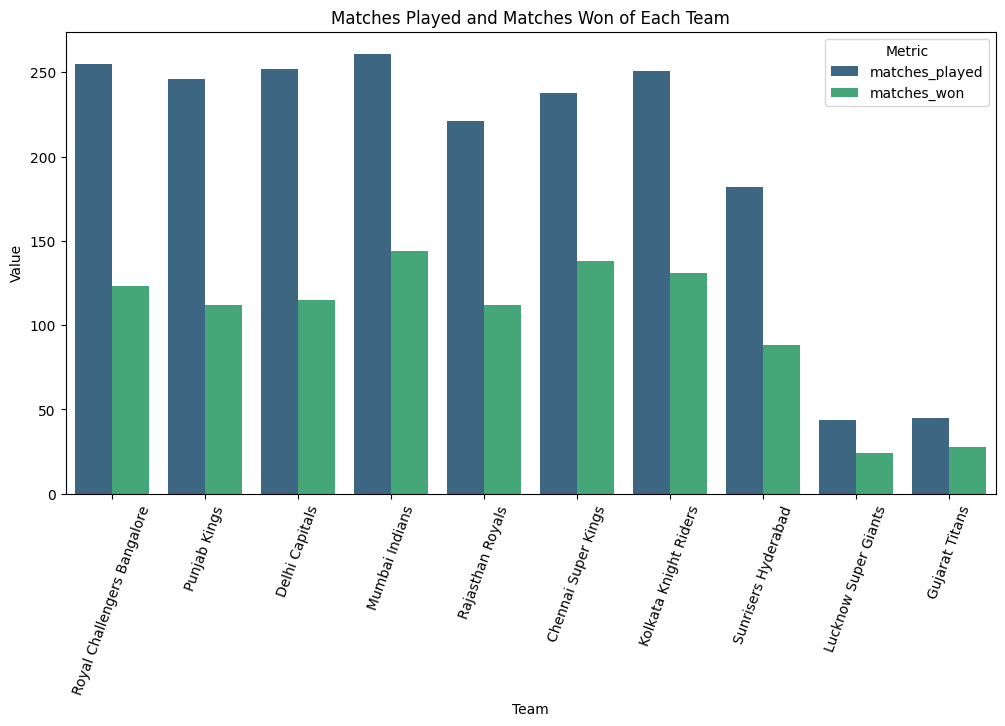

In [50]:
# Plotting Matches Played & Winning Percentage
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['matches_played', 'matches_won'], 
                                    var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette='viridis')
plt.title('Matches Played and Matches Won of Each Team')
plt.xlabel('Team')
plt.ylabel('Value')
plt.xticks(rotation=70)
plt.legend(title='Metric')
plt.show()

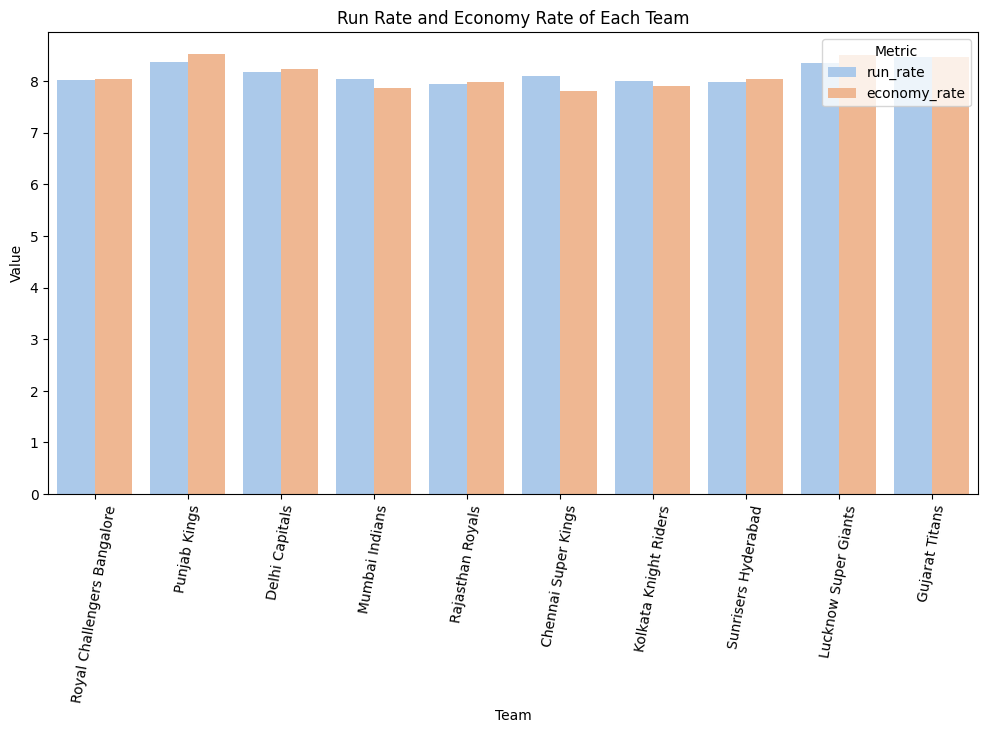

In [51]:
# Plotting Run Rate & Economy Rate
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['run_rate', 'economy_rate'], 
                                    var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette='pastel')
plt.title('Run Rate and Economy Rate of Each Team')
plt.xlabel('Team')
plt.ylabel('Value')
plt.xticks(rotation=80)
plt.legend(title='Metric')
plt.show()

In [52]:
team_stats.head()

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,255,123,48.235294,42793,5000,167.815686,8.018153,8.036039,263,49,3079,1456,51.787500,38.259091
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106,778,431,57.696429,38.622642
2,Delhi Capitals,252,115,45.634921,41422,4940,164.373016,8.167367,8.235556,257,92,1352,550,58.879121,35.292135
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68,3637,1685,53.421456,39.016260
4,Rajasthan Royals,221,112,50.678733,36250,4363,164.027149,7.944593,7.977149,226,58,3068,1215,53.518182,35.517073


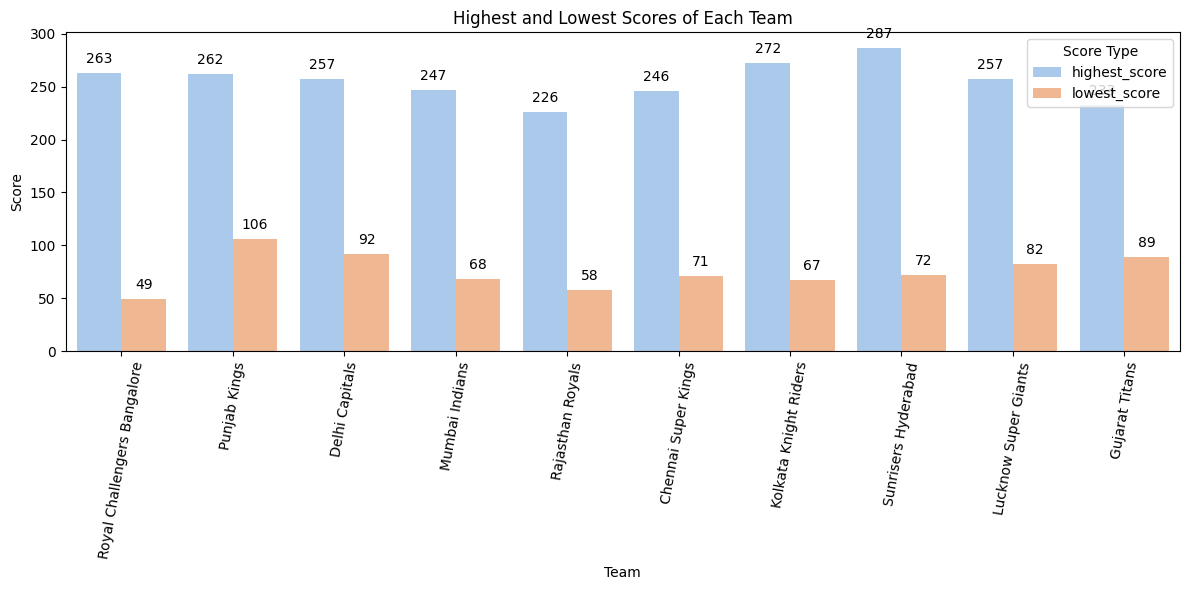

In [53]:

# Melt the DataFrame
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['highest_score', 'lowest_score'], 
                                    var_name='Score Type', value_name='Score')

# Plotting
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='team_name', y='Score', hue='Score Type', data=team_stats_melted, palette='pastel')

# Adding text annotations
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

# Customizing the plot
plt.title('Highest and Lowest Scores of Each Team')
plt.xlabel('Team')
plt.ylabel('Score')
plt.xticks(rotation=80)  # Rotate x-axis labels for readability
plt.legend(title='Score Type')
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()


In [54]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [55]:
# Aggregate runs scored by each team per match
runs_per_team_match = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Print column names to verify
print(runs_per_team_match.columns)
print(matches.columns)

# Specify the particular runs you're interested in
target_runs = 48

# Filter matches where a team scored the target runs
matches_with_target_runs = runs_per_team_match[runs_per_team_match['total_runs'] == target_runs]

# Merge with match details to get complete information
#detailed_matches = pd.merge(matches_with_target_runs, matches, on='id', how='left')

#print(f"Matches where a team scored {target_runs} runs:")
#print(matches_with_target_runs)

print(matches[matches['id']==1082648])

Index(['match_id', 'batting_team', 'total_runs'], dtype='object')
Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')
          id season       city        date  match_type  player_of_match  \
633  1082648   2017  Bangalore  2017-05-17  Eliminator  NM Coulter-Nile   

                     venue                team1                  team2  \
633  M Chinnaswamy Stadium  Sunrisers Hyderabad  Kolkata Knight Riders   

               toss_winner toss_decision                 winner   result  \
633  Kolkata Knight Riders         field  Kolkata Knight Riders  wickets   

     result_margin  target_runs  target_overs super_over method       umpire1  \
633            7.0         48.0           6.0          N    D/L  AK Chaudhary   

         umpire2  
633  Nitin

In [56]:
print(matches[matches['method']=="D/L"])

           id   season           city        date  match_type  \
38     336022  2007/08          Delhi  2008-05-17      League   
41     336025  2007/08        Kolkata  2008-05-18      League   
60     392183     2009      Cape Town  2009-04-19      League   
63     392186     2009         Durban  2009-04-21      League   
89     392214     2009      Centurion  2009-05-07      League   
192    501215     2011          Kochi  2011-04-18      League   
221    501245     2011        Kolkata  2011-05-07      League   
231    501255     2011      Bangalore  2011-05-14      League   
429    733993     2014          Delhi  2014-05-10      League   
476    829743     2015  Visakhapatnam  2015-04-22      League   
508    829807     2015      Hyderabad  2015-05-15      League   
538    980943     2016      Hyderabad  2016-04-26      League   
561    980989     2016        Kolkata  2016-05-14      League   
565    980997     2016  Visakhapatnam  2016-05-17      League   
566    980999     2016   

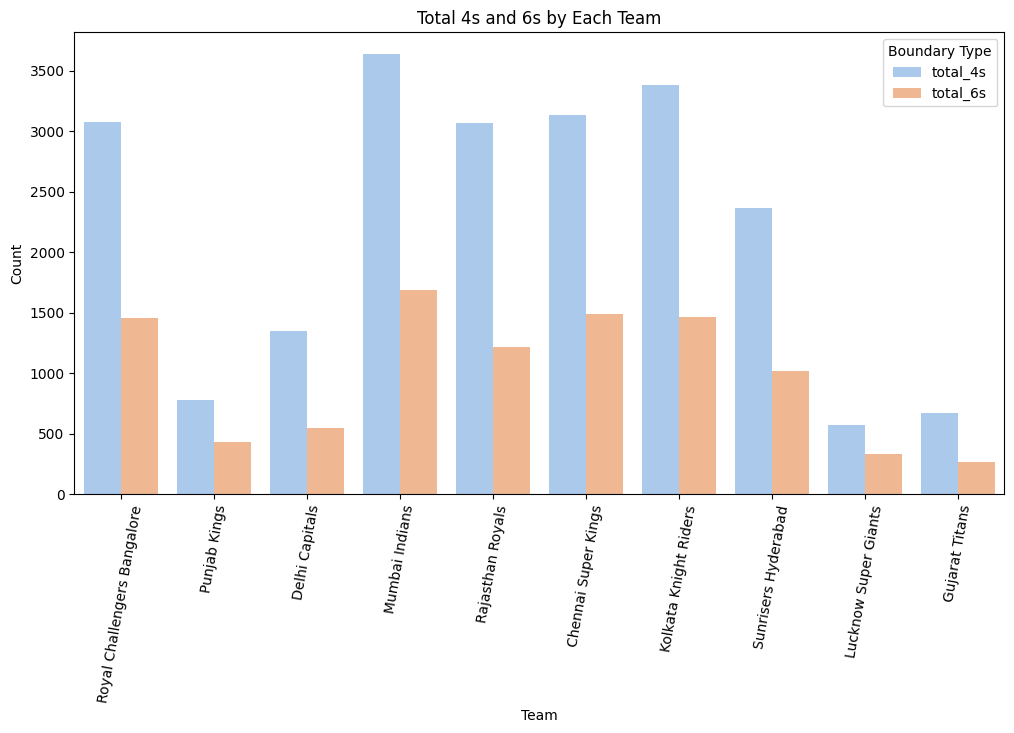

In [57]:
# Plotting Total 4s and 6s
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['total_4s', 'total_6s'], 
                                    var_name='Boundary Type', value_name='Count')
sns.barplot(x='team_name', y='Count', hue='Boundary Type', data=team_stats_melted, palette='pastel')
plt.title('Total 4s and 6s by Each Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

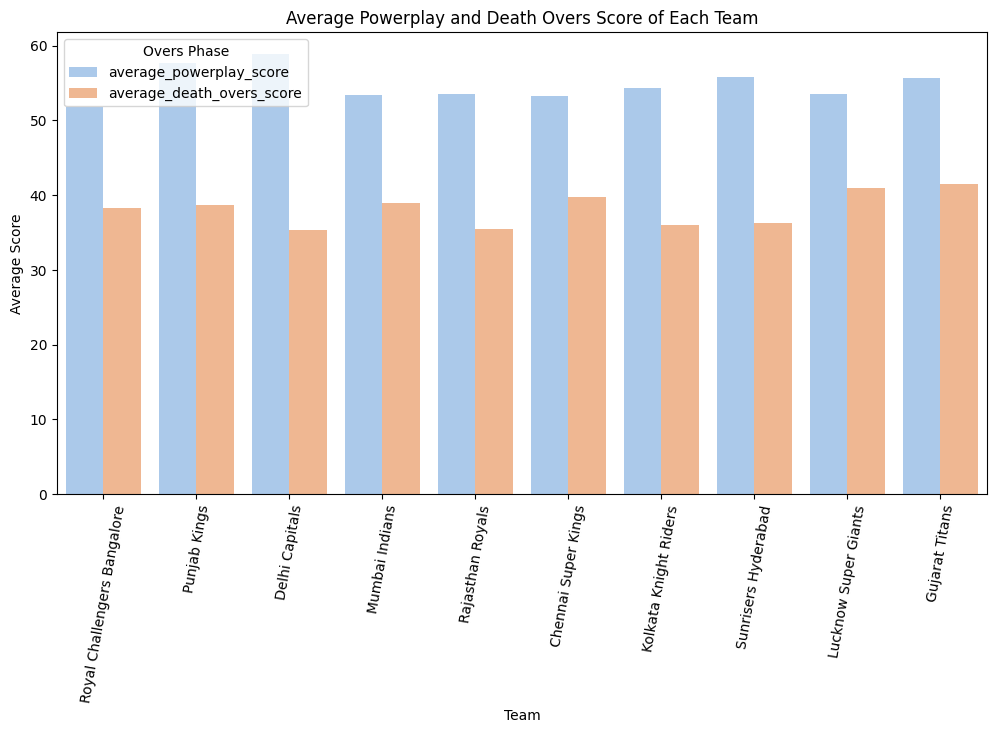

In [58]:
# Plotting Average Powerplay and Death Overs Score
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['average_powerplay_score', 'average_death_overs_score'], 
                                    var_name='Overs Phase', value_name='Average Score')
sns.barplot(x='team_name', y='Average Score', hue='Overs Phase', data=team_stats_melted, palette='pastel')
plt.title('Average Powerplay and Death Overs Score of Each Team')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.xticks(rotation=80)
plt.show()

# 2. Player Performance

In [59]:

#players.set_index('batter', inplace=True)
players.head()


,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,5,...,batting_avg,batting_strike_rate,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate,catches,man_of_the_match_count
A Ashish Reddy,28.0,196.0,23.0,280.0,61.0,83.0,20.0,1.0,16.0,0.0,...,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,35.0,505.0,35.0,634.0,183.0,201.0,48.0,3.0,46.0,0.0,...,24.38,125.54,25.0,2.0,4.0,36.0,9.00,12.50,14.0,0.0
A Chandila,12.0,7.0,2.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,...,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,6.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,...,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,3.0,25.0,4.0,13.0,1.0,0.0,1.0,0.0,...,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


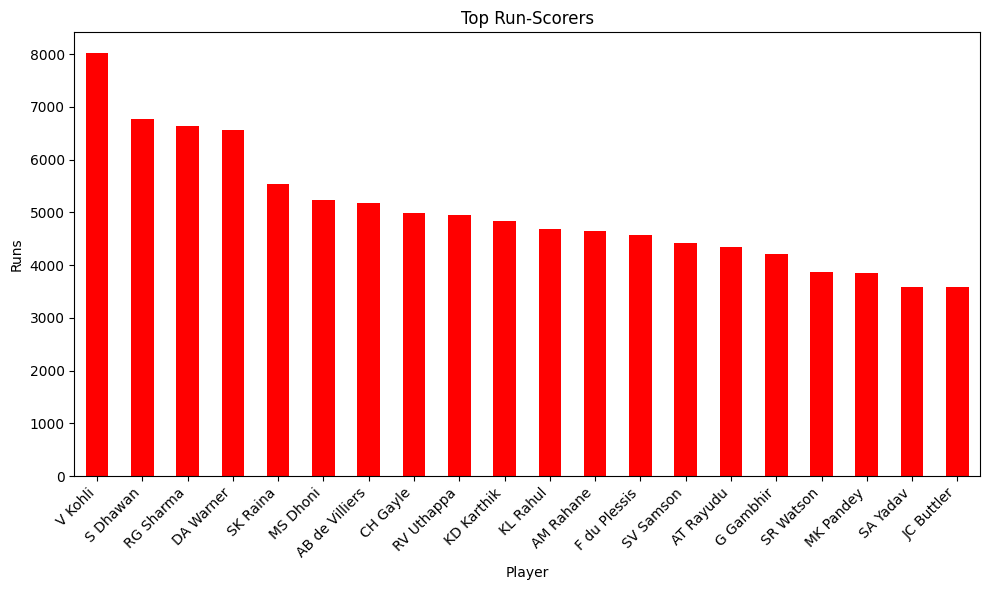

In [60]:


# Plotting top run-scorers
plt.figure(figsize=(10, 6))

# Get the top 20 run-scorers
top_run_scorers = players['runs'].nlargest(20)

# Plot the data
top_run_scorers.plot(kind='bar', color='red')

# Customizing the plot
plt.xlabel('Player')
plt.ylabel('Runs')
plt.title('Top Run-Scorers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()



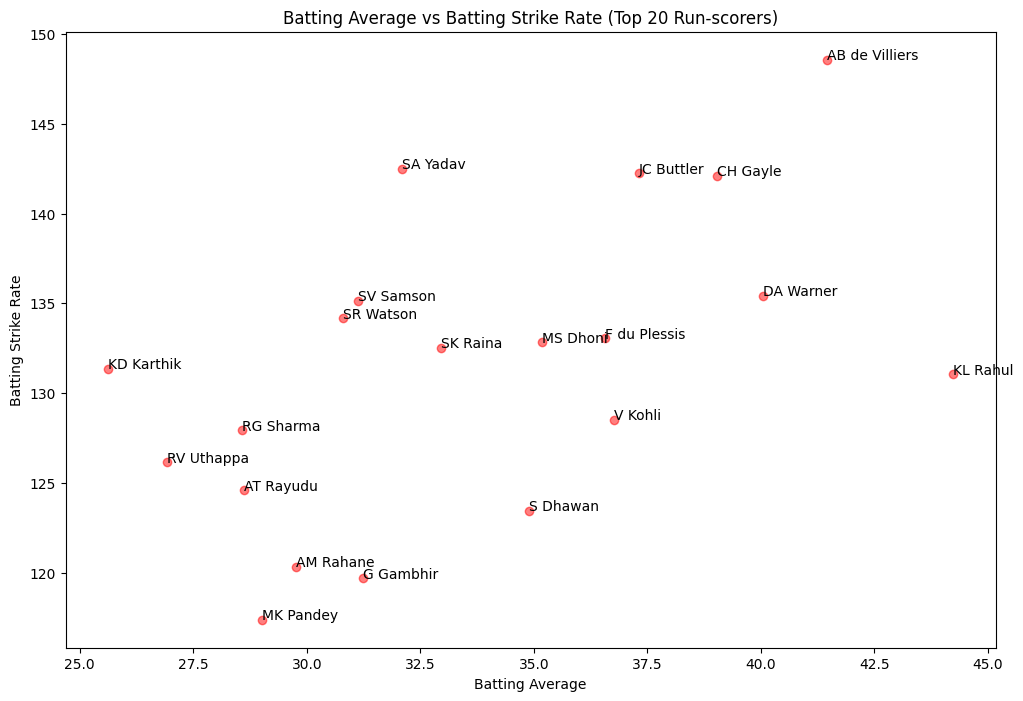

In [61]:
# Get the top 20 run-scorers
top_run_scorers = players.nlargest(20, 'runs')

# Plotting Batting Average vs Batting Strike Rate for the top 20 run-scorers
plt.figure(figsize=(12, 8))
plt.scatter(top_run_scorers['batting_avg'], top_run_scorers['batting_strike_rate'], color='red', alpha=0.5)
plt.xlabel('Batting Average')
plt.ylabel('Batting Strike Rate')
plt.title('Batting Average vs Batting Strike Rate (Top 20 Run-scorers)')

# Annotate each point with the player name
for i, player in top_run_scorers.iterrows():
    plt.annotate(i, (player['batting_avg'], player['batting_strike_rate']))

plt.show()

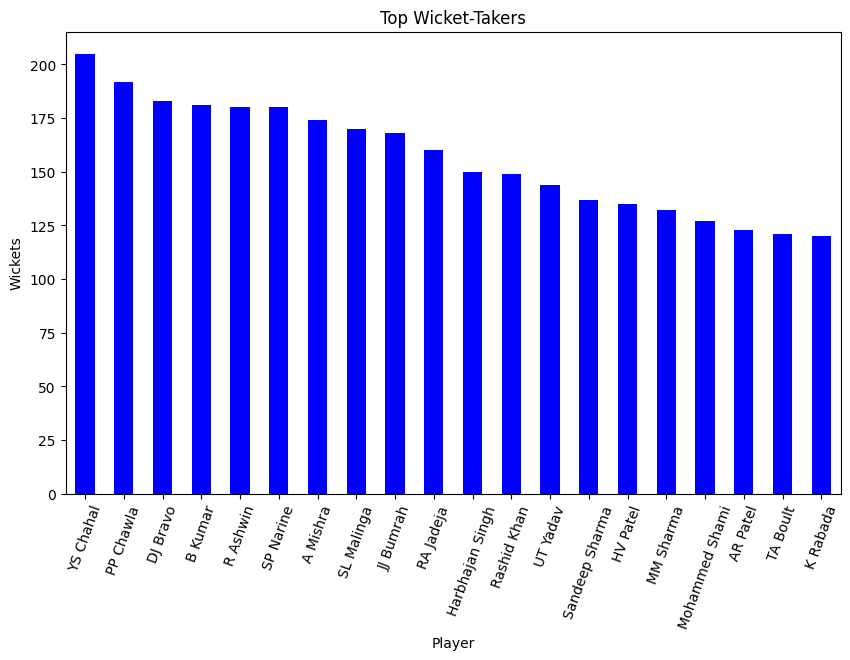

In [62]:
# Plotting top wicket-takers
plt.figure(figsize=(10, 6))
top_wicket_takers = players['wickets'].nlargest(20)
top_wicket_takers.plot(kind='bar', color='blue')
plt.xlabel('Player')
plt.ylabel('Wickets')
plt.title('Top Wicket-Takers')
plt.xticks(rotation=70)
plt.show()


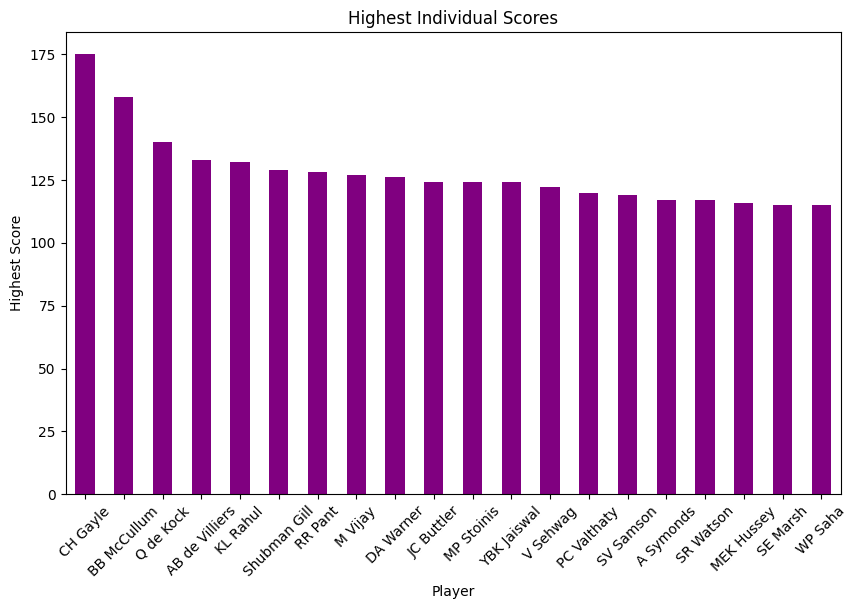

In [63]:
plt.figure(figsize=(10, 6))
highest_scores = players['highest_score'].nlargest(20)
highest_scores.plot(kind='bar', color='purple')
plt.xlabel('Player')
plt.ylabel('Highest Score')
plt.title('Highest Individual Scores')
plt.xticks(rotation=45)
plt.show()

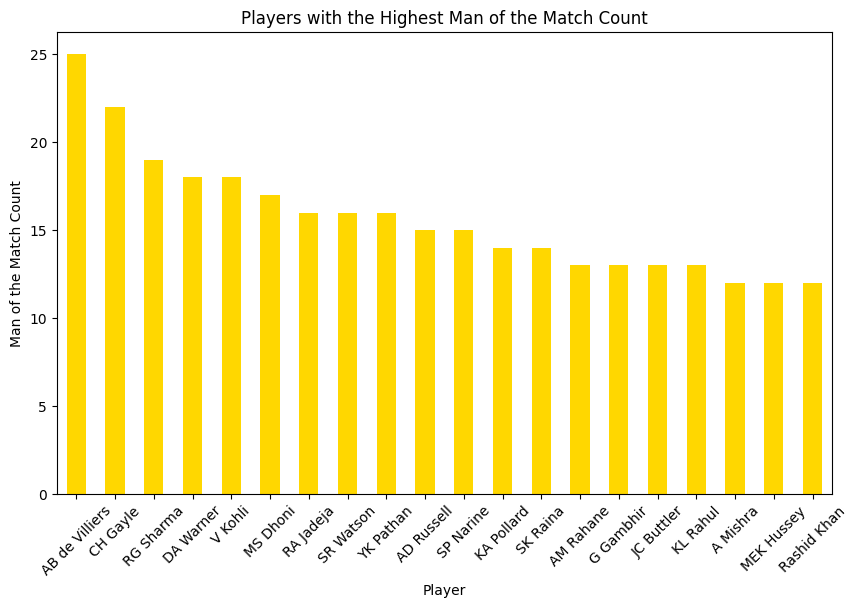

In [64]:
# Man of the Match Count
plt.figure(figsize=(10, 6))
top_mom_players = players['man_of_the_match_count'].nlargest(20)
top_mom_players.plot(kind='bar', color='gold')
plt.xlabel('Player')
plt.ylabel('Man of the Match Count')
plt.title('Players with the Highest Man of the Match Count')
plt.xticks(rotation=45)
plt.show()

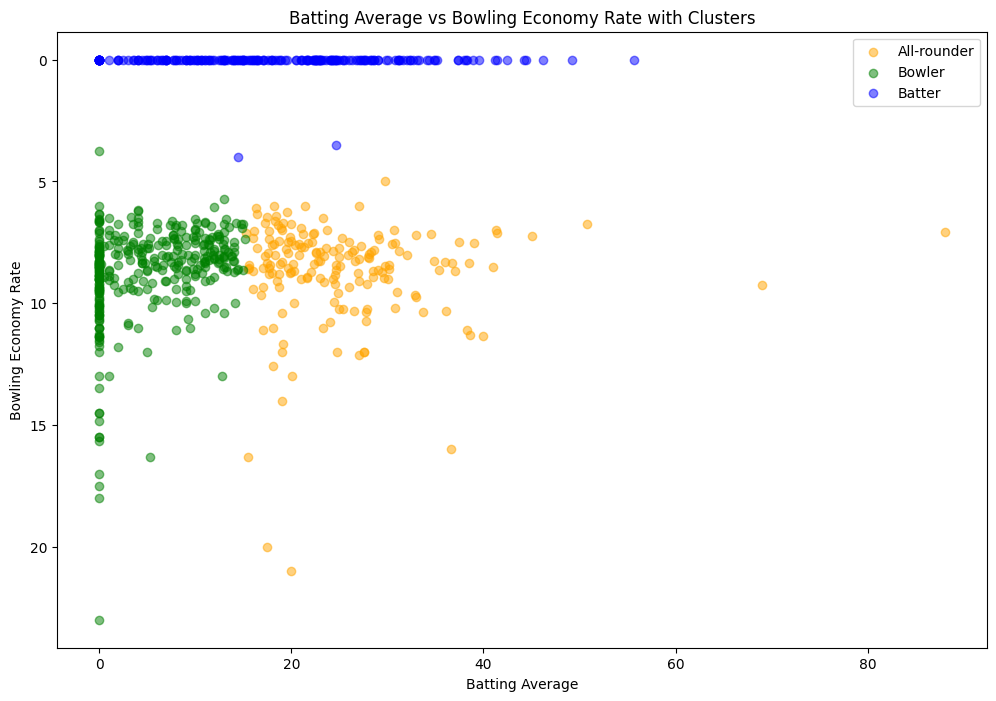

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Copy the DataFrame
players_copy = players.copy()

players_copy = players_copy[['bowling_econ', 'batting_avg']]

# Check for NaN or infinite values
players_copy = players_copy.replace([float('inf'), -float('inf')], pd.NA)  # Replace inf with NaN
players_copy = players_copy.dropna()  # Drop rows with NaN values

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(players_copy)

# Apply K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster column to the copied DataFrame
players_copy['clusters'] = clusters

players = players.join(players_copy['clusters'], how='left', rsuffix='_cluster')

# Define cluster labels and colors
cluster_labels = {0: 'Batter', 1: 'Bowler', 2: 'All-rounder'}
colors = {'Batter': 'blue', 'Bowler': 'green', 'All-rounder': 'orange'}

# Map cluster labels to the clusters in the DataFrame
players['cluster'] = players['clusters'].map(cluster_labels)

# Check for NaN values in the 'cluster' column
# print(players['cluster'].isna().sum())

# Plotting Batting Average vs Bowling Economy Rate with clusters
plt.figure(figsize=(12, 8))

# Ensure no NaN values in 'cluster' column before plotting
players_no_nan = players.dropna(subset=['cluster'])

for cluster in players_no_nan['cluster'].unique():
    subset = players_no_nan[players_no_nan['cluster'] == cluster]
    plt.scatter(subset['batting_avg'], subset['bowling_econ'], 
                color=colors[cluster], label=cluster, alpha=0.5)

plt.xlabel('Batting Average')
plt.ylabel('Bowling Economy Rate')
plt.title('Batting Average vs Bowling Economy Rate with Clusters')
plt.gca().invert_yaxis()  # Invert y-axis to show better economy rates higher up
plt.legend()
plt.show()